# Whittle-Matern
## spatially varying isotropic covariance

### Neumann boundary conditions

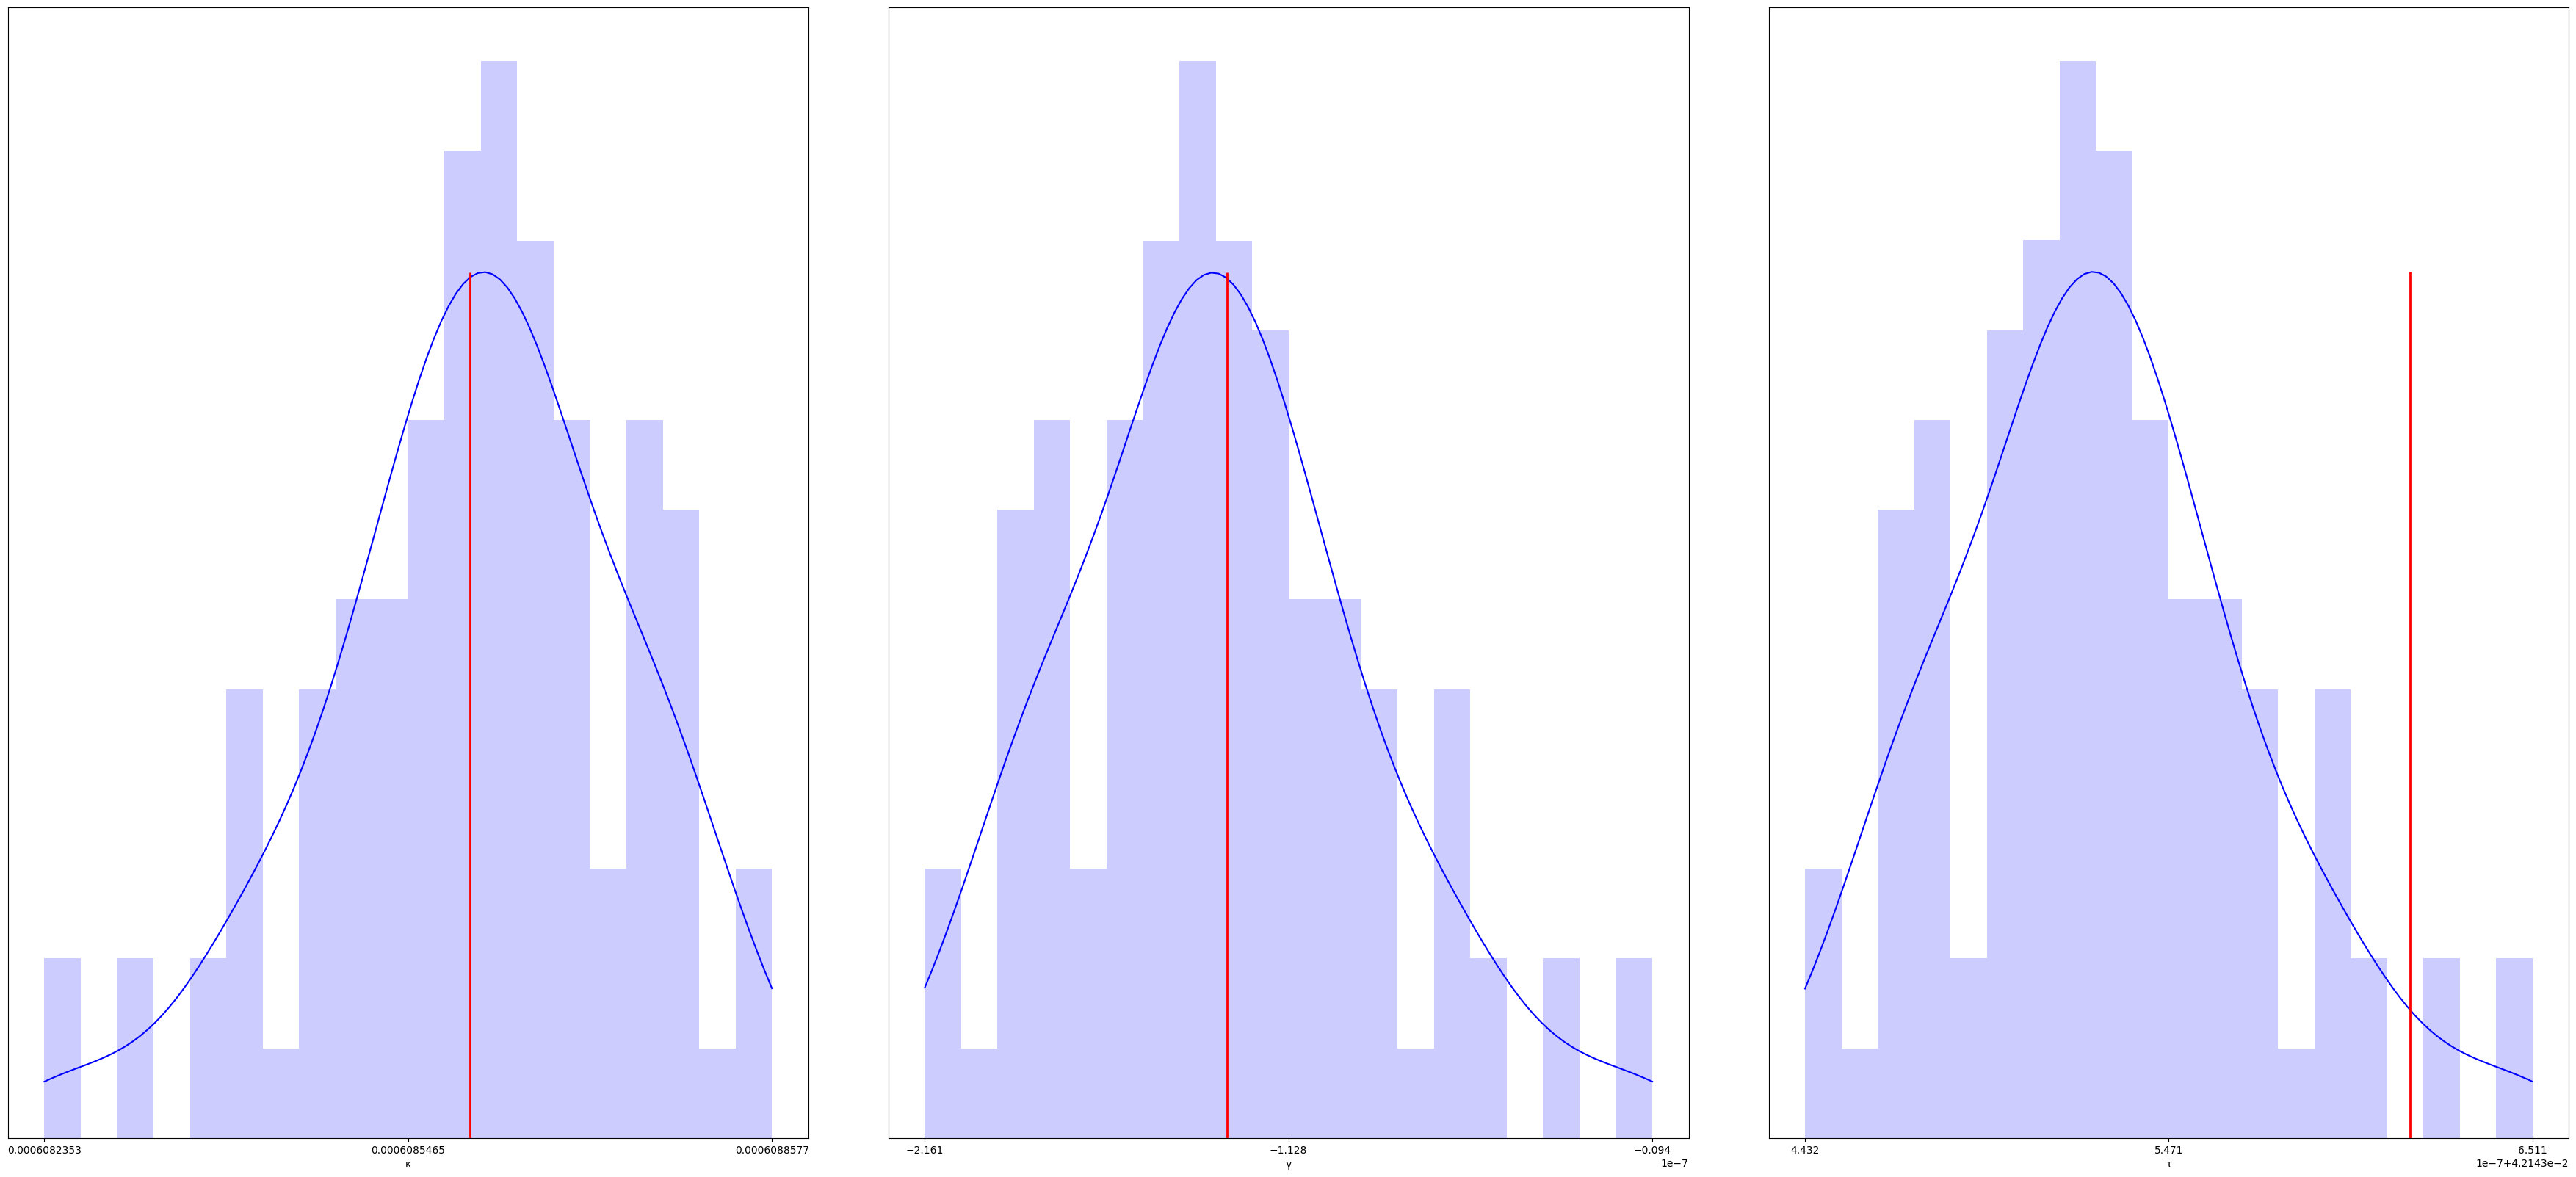

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
grad_res = np.load('../grad/whittle-matern-isotropic-2D-bc1.npz')
ngrad = grad_res['ngrad']
sgrad = grad_res['sgrad']

m = 3
n = 1
fig, ax = plt.subplots(figsize = (45,20),ncols = m, nrows = n)
titles = np.array(["\u03BA", "\u03B3", "\u03C4"])
for i in range(m):
        tx = np.linspace(sgrad[i,:].min(),sgrad[i,:].max(),100)
        ty = gaussian_kde(sgrad[i,:])(tx)
        ax[i].plot(tx,ty,'b')
        ax[i].hist(sgrad[i,:],density = True, bins = 20, color = 'b', alpha = 0.2)
        ax[i].vlines(x=ngrad[i],ymin = 0,ymax = ty.max(),colors='r',linewidth = 2)
        ax[i].set_xlabel(titles[i],fontsize = 10)
        ax[i].set_yticks([])
        ax[i].set_xticks(np.linspace(tx.min(),tx.max(),3))
fig.subplots_adjust(wspace = 0.1, hspace = 0.3)

### Dirichlet boundary conditions

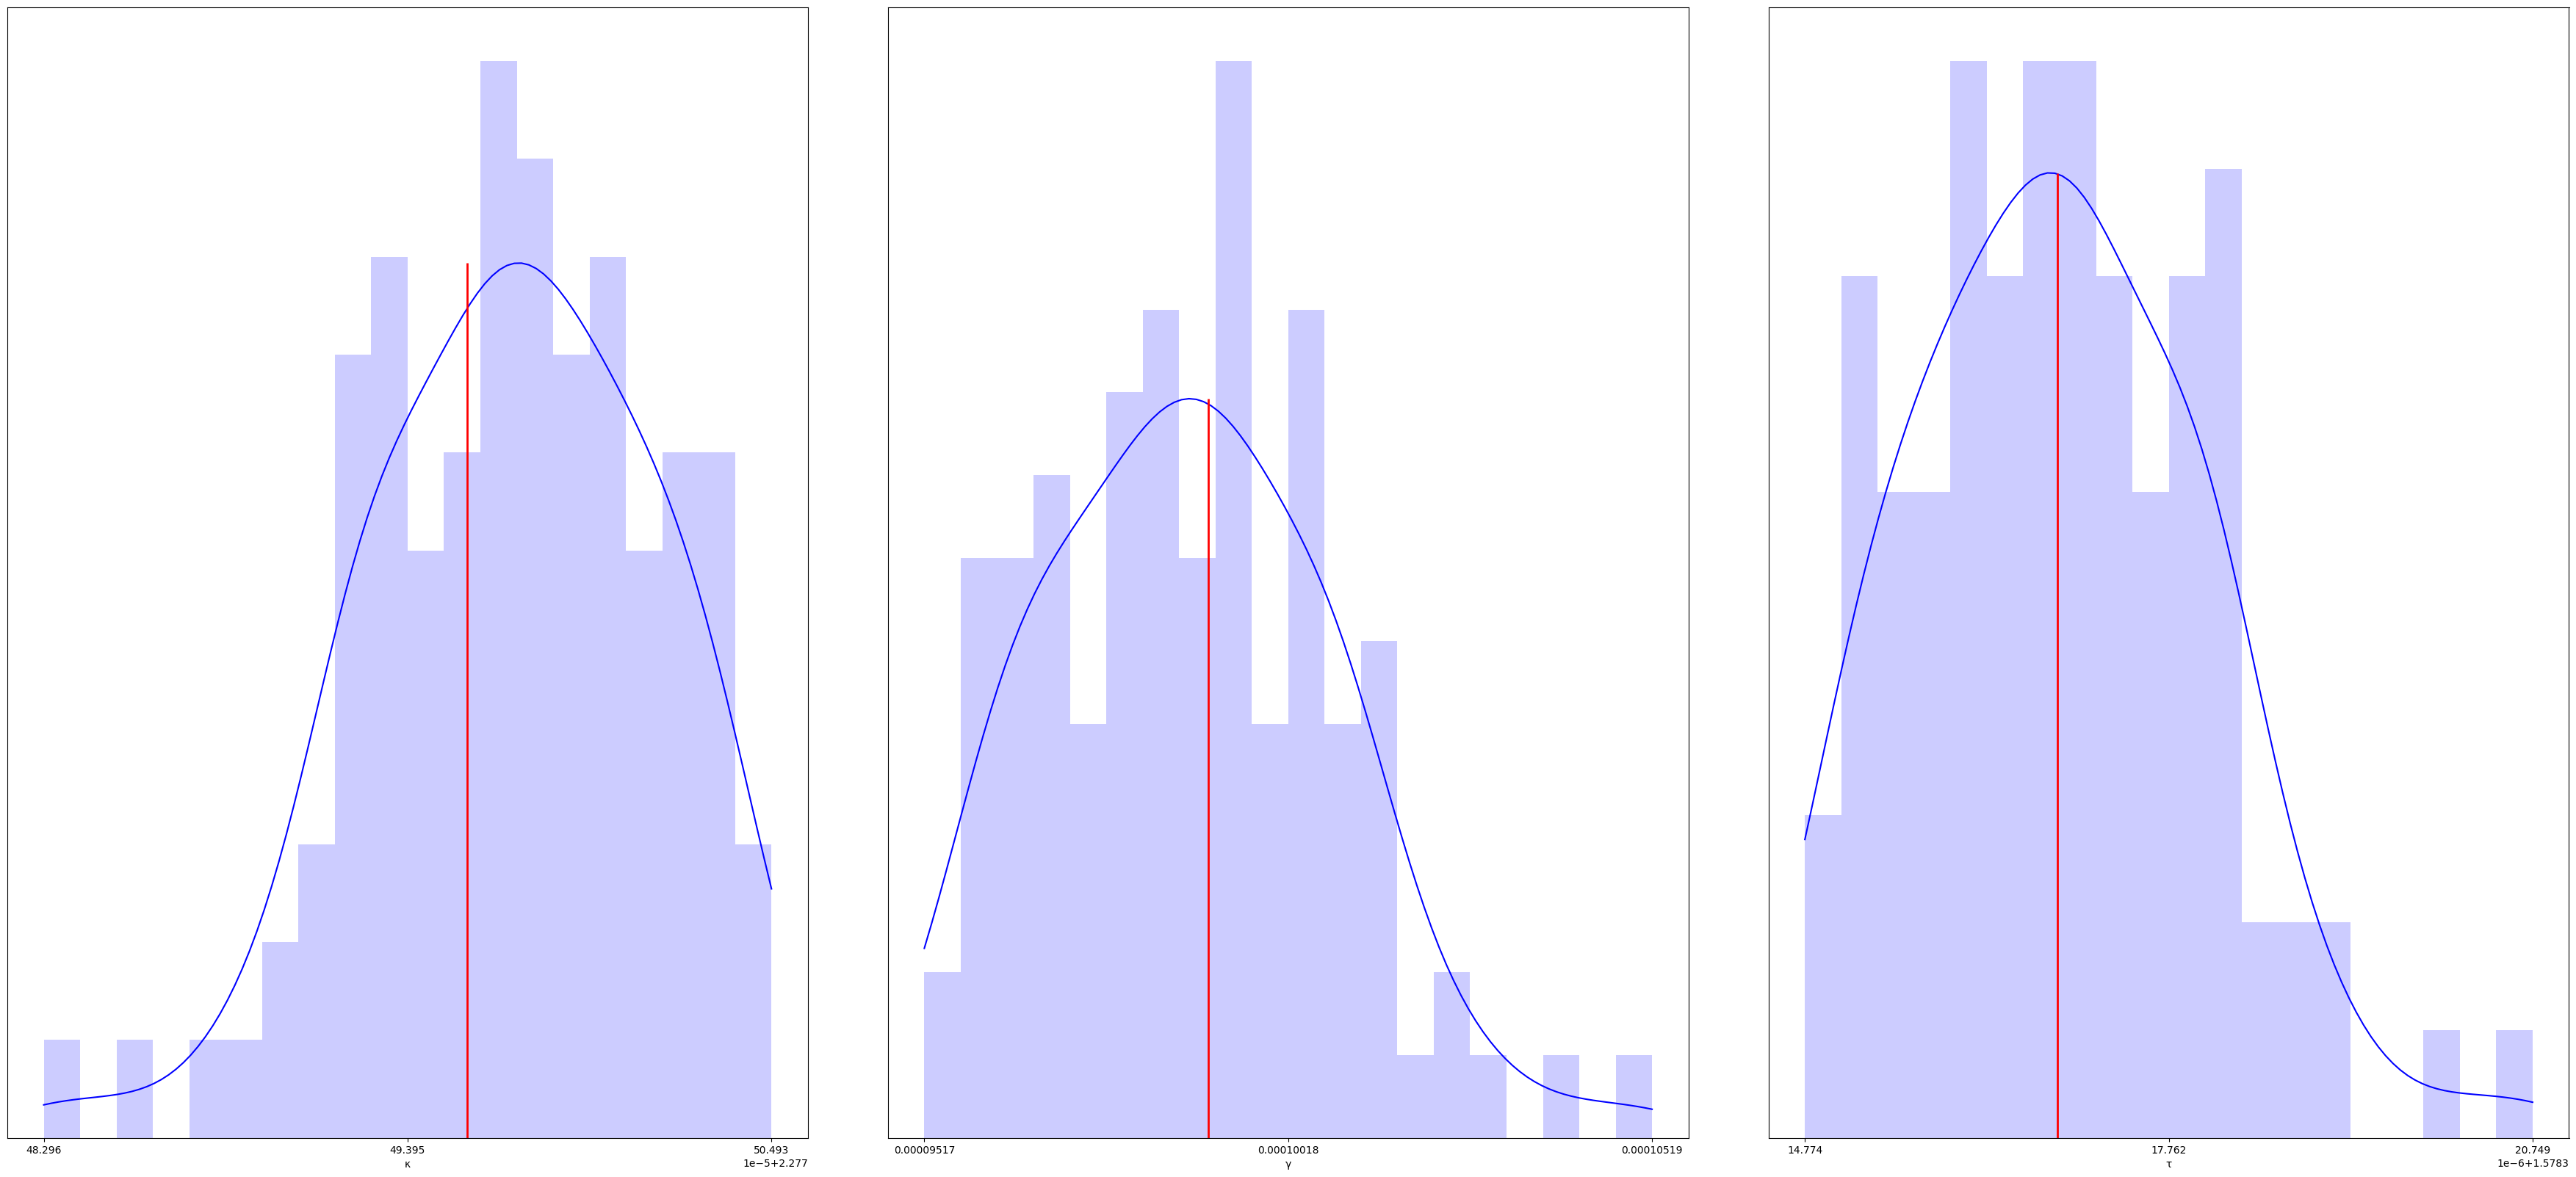

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
grad_res = np.load('../grad/whittle-matern-isotropic-2D-bc3.npz')
ngrad = grad_res['ngrad']
sgrad = grad_res['sgrad']

m = 3
n = 1
fig, ax = plt.subplots(figsize = (45,20),ncols = m, nrows = n)
titles = np.array(["\u03BA", "\u03B3","\u03C4"])
for i in range(m):
        tx = np.linspace(sgrad[i,:].min(),sgrad[i,:].max(),100)
        ty = gaussian_kde(sgrad[i,:])(tx)
        ax[i].plot(tx,ty,'b')
        ax[i].hist(sgrad[i,:],density = True, bins = 20, color = 'b', alpha = 0.2)
        ax[i].vlines(x=ngrad[i],ymin = 0,ymax = ty.max(),colors='r',linewidth = 2)
        ax[i].set_xlabel(titles[i],fontsize = 10)
        ax[i].set_yticks([])
        ax[i].set_xticks(np.linspace(tx.min(),tx.max(),3))
fig.subplots_adjust(wspace = 0.1, hspace = 0.3)

### Wrapping boundary conditions

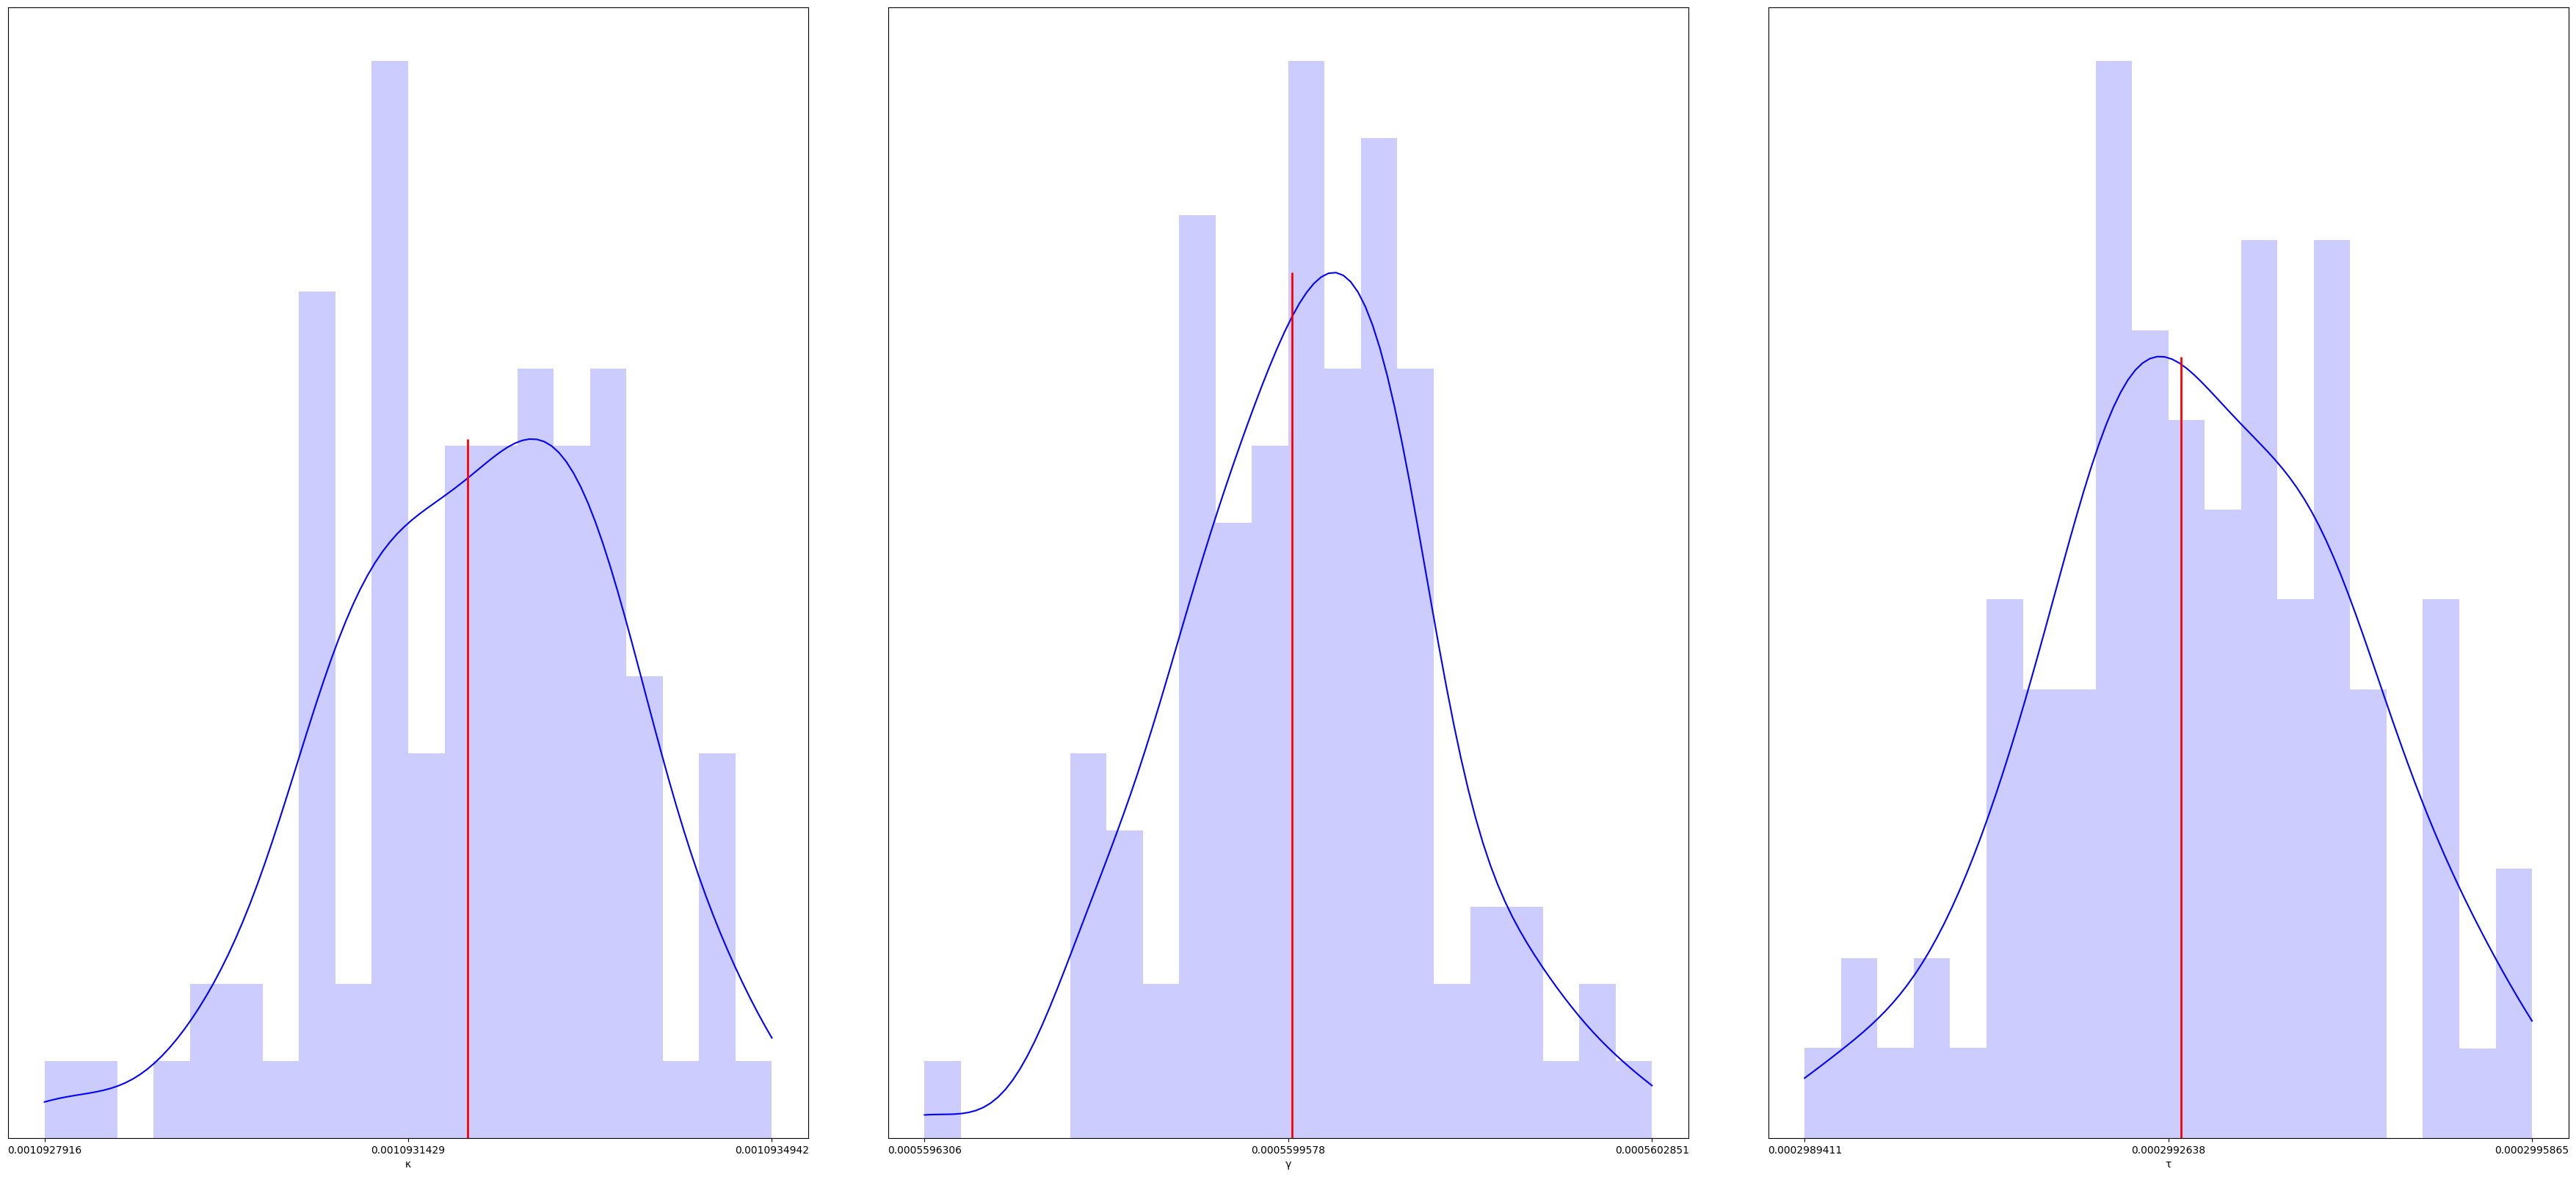

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
grad_res = np.load('../grad/whittle-matern-isotropic-2D-bc2.npz')
ngrad = grad_res['ngrad']
sgrad = grad_res['sgrad']

m = 3
n = 1
fig, ax = plt.subplots(figsize = (45,20),ncols = m, nrows = n)
titles = np.array(["\u03BA", "\u03B3", "\u03C4"])
for i in range(m):
        tx = np.linspace(sgrad[i,:].min(),sgrad[i,:].max(),100)
        ty = gaussian_kde(sgrad[i,:])(tx)
        ax[i].plot(tx,ty,'b')
        ax[i].hist(sgrad[i,:],density = True, bins = 20, color = 'b', alpha = 0.2)
        ax[i].vlines(x=ngrad[i],ymin = 0,ymax = ty.max(),colors='r',linewidth = 2)
        ax[i].set_xlabel(titles[i],fontsize = 10)
        ax[i].set_yticks([])
        ax[i].set_xticks(np.linspace(tx.min(),tx.max(),3))
fig.subplots_adjust(wspace = 0.1, hspace = 0.3)

#### Visualization

In [ ]:
import spdepy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from tqdm import tqdm    

data = sp.datasets.get_sinmod_training()
bc = 3
mod = sp.model(grid = sp.grid(x=data['x'], y=data['y'], extend = 5),
        spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False,
        parameters = np.load('../fits/whittle_matern_bc3.npy'))
mod.mod.setPars(mod.mod.initFit(data['muf']))
mod.mod.setQ()

#### Prediction on test set